# Task6: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Read the csv data into a pandas dataframe and display the first 5 samples

In [3]:
# Read the csv data into a pandas dataframe
df = pd.read_csv('Real estate.csv')

# Display the first 5 samples
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [4]:
# Display detailed information about the dataframe
print(df.info())

# Display summary statistics of the dataframe's columns
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB
None
               No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148971

### Find how many samples are there and how many columns are there in the dataset

In [5]:
# Get the number of samples (rows) and columns
num_samples, num_columns = df.shape

print(f"There are {num_samples} samples in the dataset.")
print(f"There are {num_columns} columns in the dataset.")

There are 414 samples in the dataset.
There are 8 columns in the dataset.


### What are the features available in the dataset?

In [6]:
# Get the list of features available in the dataset
features = df.columns

print(features)

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')


### Check if any features have missing data

In [7]:
# Get the count of missing values for each feature
missing_values = df.isnull().sum()

print(missing_values)

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


### Group all the features as dependent features in X

In [8]:
# Group all the features as dependent features in X
X = df.drop('Y house price of unit area', axis=1)

# Display the rows of X
(X)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


### Group feature(s) as independent features in y

In [9]:
# Group the 'Y house price of unit area' column as the independent feature in y
y = df['Y house price of unit area']

# Display the first 5 and last 5 entries of y
y.head()

y.tail()
print(f"\nName: {y.name}, Length: {y.shape[0]}, dtype: {y.dtype}")



Name: Y house price of unit area, Length: 414, dtype: float64


### Split the dataset into train and test data

In [13]:
X = df.drop('Y house price of unit area', axis=1)
y = df['Y house price of unit area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data (features): {X_train.shape}")
print(f"Training data (target): {y_train.shape}")
print(f"Testing data (features): {X_test.shape}")
print(f"Testing data (target): {y_test.shape}")


Training data (features): (331, 7)
Training data (target): (331,)
Testing data (features): (83, 7)
Testing data (target): (83,)


### Choose the model (Linear Regression)

In [14]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Value: {r2}")

Mean Squared Error: 54.60196067337511
R-squared Value: 0.6745228670350991


### Create an Estimator object

In [15]:
estimator = LinearRegression()


### Train the model

In [16]:
estimator.fit(X_train, y_train)

LinearRegression()

### Apply the model

In [17]:
y_pred_subset = estimator.predict(X_test[:21])
print(y_pred_subset)

[47.04645871 40.40783016 43.37463978 39.20600382 26.62817953 45.8923956
 44.33888897 46.74448468 24.43235155 55.06258487 34.60848974 36.92386329
 36.76420984 24.30494918 35.79519845 33.44810036 44.24993318 44.98654734
 29.18096544 44.80711275  1.15259949]


### Display the coefficients

In [18]:
coefficients = estimator.coef_
print(coefficients)

[-5.61695287e-03  5.40743502e+00 -2.67827999e-01 -4.81543315e-03
  1.08114445e+00  2.26048799e+02 -3.01254914e+01]


### Find how well the trained model did with testing data

In [19]:
y_pred = estimator.predict(X_test)
r2_value = r2_score(y_test, y_pred)
print(f"r2 Score : {r2_value}")

r2 Score : 0.6745228670350991


### Plot House Age Vs Price
#### Hint: Use regplot in sns

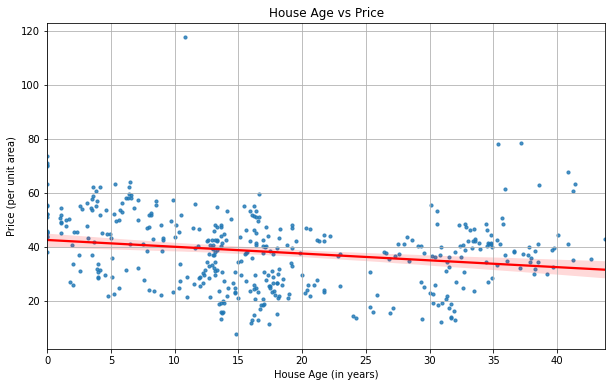

In [21]:
house_age = df['X2 house age']
price = df['Y house price of unit area']

plt.figure(figsize=(10, 6))
sns.regplot(x=house_age, y=price, scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('House Age vs Price')
plt.xlabel('House Age (in years)')
plt.ylabel('Price (per unit area)')
plt.grid(True)
plt.show()


### Plot Distance to MRT station Vs Price

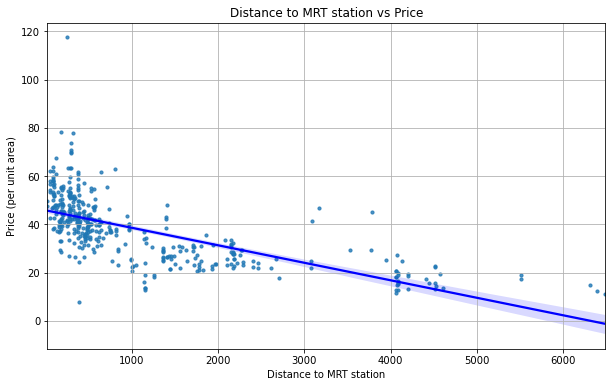

In [22]:
distance_to_mrt = df['X3 distance to the nearest MRT station']
price = df['Y house price of unit area']
plt.figure(figsize=(10, 6))
sns.regplot(x=distance_to_mrt, y=price, scatter_kws={'s':10}, line_kws={'color':'blue'})
plt.title('Distance to MRT station vs Price')
plt.xlabel('Distance to MRT station')
plt.ylabel('Price (per unit area)')
plt.grid(True)
plt.show()


### Plot Number of Convienience Stores Vs Price

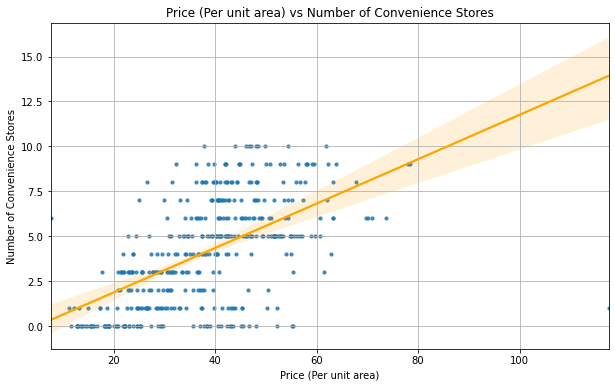

In [27]:
num_stores = df['X4 number of convenience stores']
price = df['Y house price of unit area']

plt.figure(figsize=(10, 6))
sns.regplot(x=price, y=num_stores, scatter_kws={'s':10}, line_kws={'color':'orange'})
plt.title('Price (Per unit area) vs Number of Convenience Stores')
plt.xlabel('Price (Per unit area)')
plt.ylabel('Number of Convenience Stores')
plt.grid(True)
plt.show()
